<a href="https://colab.research.google.com/github/jyasyeer/midproject_SQL-analysis-using-python/blob/main/tugas12_Muhammad_Jasir_Nabil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing library
import psycopg2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Building the database connection
conn = psycopg2. connect(
    dbname="tugas12",
    user="postgres",
    password="12345",
    host="localhost",
    port="5433"

)

1. What were the least and most ordered items? What categories were they in?

In [ ]:
# Query to find the least and most ordered items
query = """
SELECT mi.item_name, mi.category, COUNT(*) as order_count
FROM order_details od
JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY mi.item_name, mi.category
ORDER BY order_count DESC;
"""

# Execute the query and display results
df_order_counts = pd.read_sql_query(query, conn)
df_order_counts

,item_name,category,order_count
0,Hamburger,American,622
1,Edamame,Asian,620
2,Korean Beef Bowl,Asian,588
3,Cheeseburger,American,583
4,French Fries,American,571
5,Tofu Pad Thai,Asian,562
6,Steak Torta,Mexican,489
7,Spaghetti & Meatballs,Italian,470
8,Mac & Cheese,American,463
9,Chips & Salsa,Mexican,461


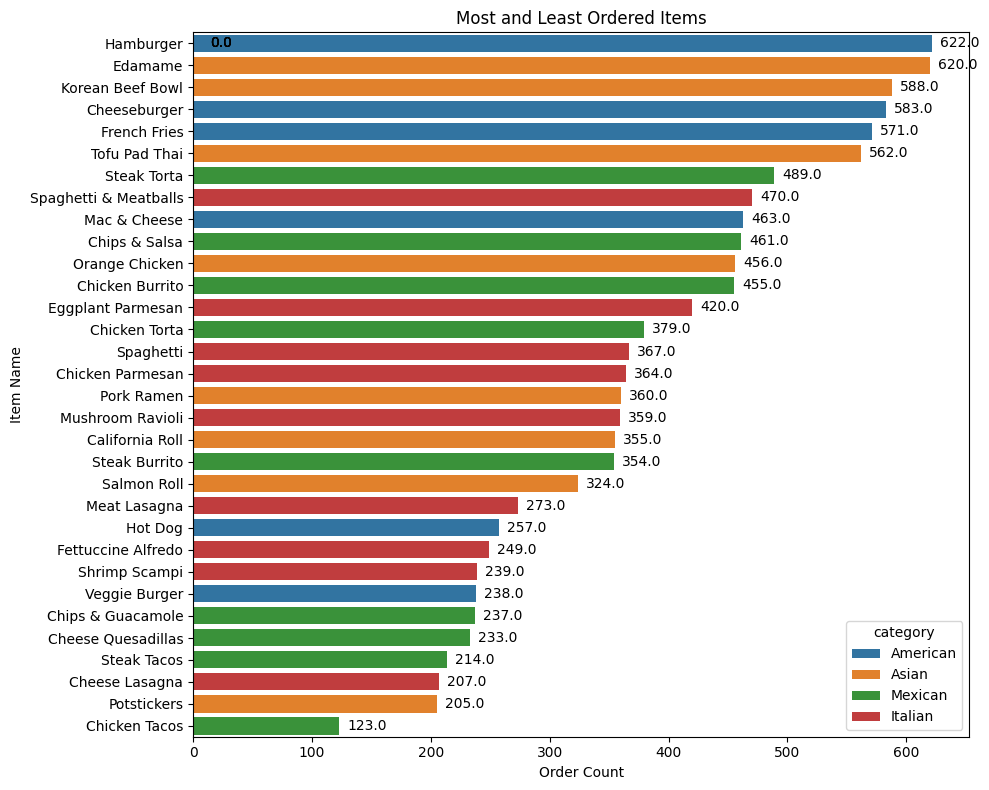

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(
    data=df_order_counts,  # replace with your actual dataframe variable name
    y='item_name',         # or x if your chart is horizontal
    x='order_count',
    hue='category',
    dodge=False
)

# Add the text annotations for each bar.
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.1f'),
                      (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.),
                      ha = 'center',
                      va = 'center',
                      xytext = (20, 0),
                      textcoords = 'offset points')

plt.title('Most and Least Ordered Items')
plt.xlabel('Order Count')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

American cuisine appears to be particularly popular, with hamburgers being the most ordered item.as seen in the red dots.
The most ordered item was the Hamburger from the American category, and the least ordered item was Chicken Tacos from the Mexican category.


Insight : Customers appear to have a strong preference for American and Asian cuisine, with hamburgers, edamame and Korean Beef Bowls dominating the top orders.Mexican and Italian cuisine are not as popular as American and Asian cuisine. This could be an indication that restaurants need to review menu offerings in this category


2. What do the highest spend orders look like? Which items did they buy and how much did they spend?

    order_id              item_name  price  total_spend
0       4836              Hamburger  12.95       177.20
1       4836        Chicken Burrito  12.95       177.20
2       4836         Cheese Lasagna  15.50       177.20
3       4836       Korean Beef Bowl  17.95       177.20
4       4836           Meat Lasagna  17.95       177.20
5       4836          Tofu Pad Thai  14.50       177.20
6       4836     Fettuccine Alfredo  14.50       177.20
7       4836           Mac & Cheese   7.00       177.20
8       4836              Spaghetti  14.50       177.20
9       4836          Shrimp Scampi  19.95       177.20
10      4836                Edamame   5.00       177.20
11      4836            Steak Torta  13.95       177.20
12      4836          Veggie Burger  10.50       177.20
13      3473          Veggie Burger  10.50       175.55
14      3473     Fettuccine Alfredo  14.50       175.55
15      3473  Spaghetti & Meatballs  17.95       175.55
16      3473       Korean Beef Bowl  17.95      

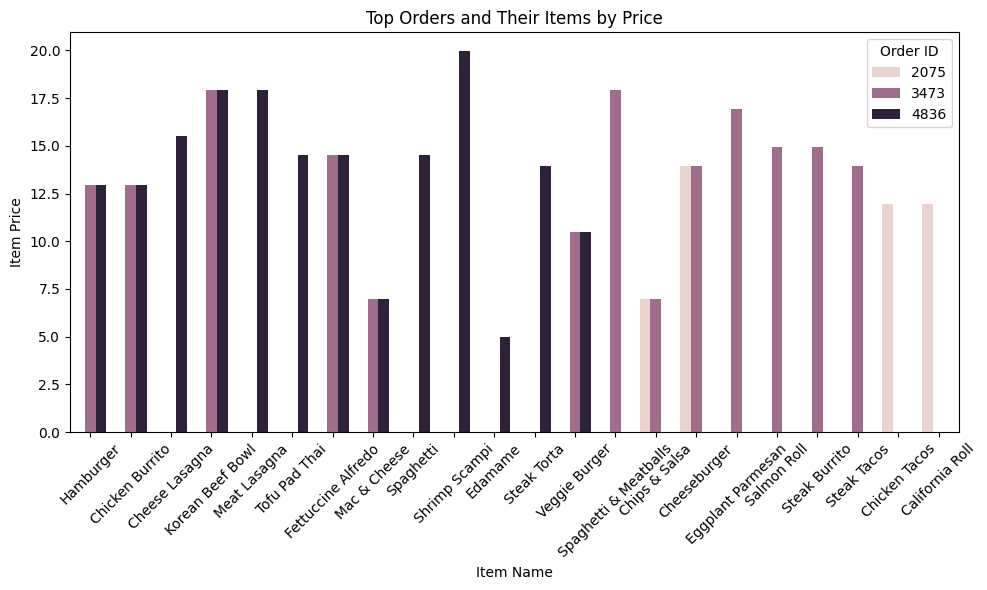

In [ ]:
# Define the query to find the highest spend orders
query = """
SELECT od.order_id, mi.item_name, mi.price, SUM(mi.price) OVER (PARTITION BY od.order_id) AS total_spend
FROM order_details od
JOIN menu_items mi ON od.item_id = mi.menu_item_id
GROUP BY od.order_id, mi.item_name, mi.price
ORDER BY total_spend DESC
LIMIT 30;
"""

# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(df)

# Visualizing the data
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='price', hue='order_id', data=df)
plt.title('Top Orders and Their Items by Price')
plt.xlabel('Item Name')
plt.ylabel('Item Price')
plt.xticks(rotation=45)
plt.legend(title='Order ID')
plt.tight_layout()
plt.show()

each order ID does not consistently indicate a high or low priced item, but rather a combination of both. This could indicate that customers tend to choose a mix of high- and low-priced items in one order.Orders with order_id 4836 had the highest recorded total spend of $177.20. Items purchased included Hamburger, Chicken Burrito, Cheese Lasagna, Korean Beef Bowl, Meat Lasagna, Tofu Pad Thai, Fettuccine Alfredo, Mac & Cheese, Spaghetti, Shrimp Scampi, Edamame, Steak Torta, and Veggie Burger.


Insight : Restaurants may be able to leverage this information to create attractive combo packages or promotions by combining items with high profit margins and high popularity to increase sales and customer satisfaction.


3. Were there certain times that had more or less orders?

Yes, the chart shows that there were certain times with more orders, particularly around 12:00 and 18:00, indicating lunch and dinner rushes, respectively. There were fewer orders in the late morning (10:00) and a significant drop-off after 20:00.

In [ ]:
# Define the query to analyze orders by time of day
query = """
SELECT EXTRACT(HOUR FROM order_time) AS order_hour, COUNT(*) AS order_count
FROM order_details
GROUP BY order_hour
ORDER BY order_hour;
"""

# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(df)

    order_hour  order_count
0         10.0            5
1         11.0          630
2         12.0         1672
3         13.0         1575
4         14.0          968
5         15.0          751
6         16.0         1054
7         17.0         1370
8         18.0         1307
9         19.0         1085
10        20.0          889
11        21.0          608
12        22.0          309
13        23.0           11


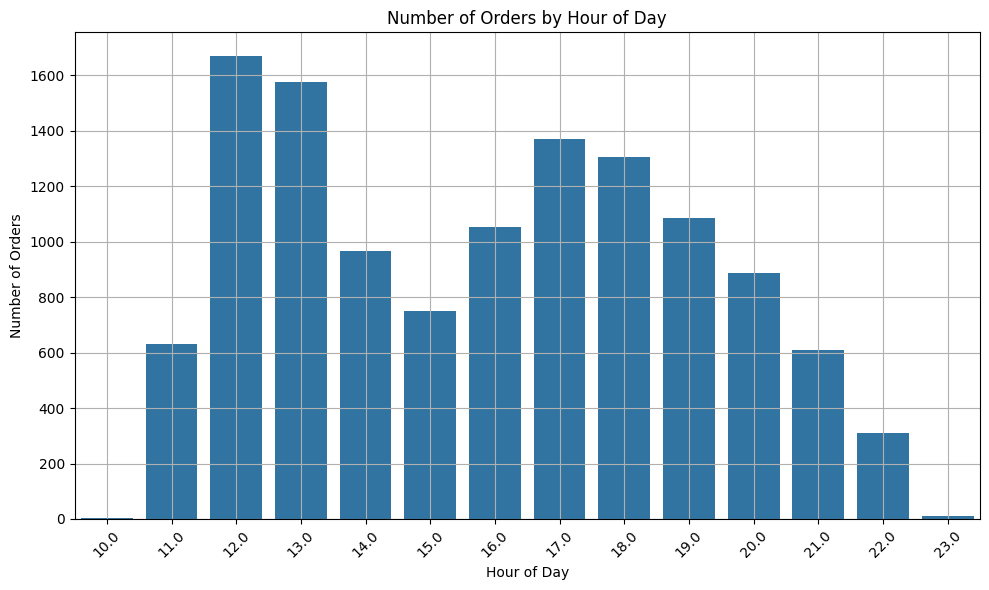

In [ ]:
# Visualizing the data
plt.figure(figsize=(10, 6))
sns.barplot(x='order_hour', y='order_count', data=df)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The number of orders increases significantly from 11:00 to the first peak at 12:00, this may indicate lunch time when many customers come or order food.


Insight : Hours with lower orders, such as the afternoon before dinner time, can be targets for special promotions to increase sales.Kitchen and service staff should prepare for a surge in orders around lunch and dinner hours, perhaps by prepping ingredients



4. Which cuisines should we focus on developing more menu items for based on the data?

In [ ]:
# Define the query to analyze sales by cuisine category
query = """
SELECT mi.category, COUNT(od.item_id) AS items_sold, SUM(mi.price) AS total_sales
FROM menu_items mi
JOIN order_details od ON mi.menu_item_id = od.item_id
GROUP BY mi.category
ORDER BY total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print(df)

   category  items_sold  total_sales
0   Italian        2948     49462.70
1     Asian        3470     46720.65
2   Mexican        2945     34796.80
3  American        2734     28237.75


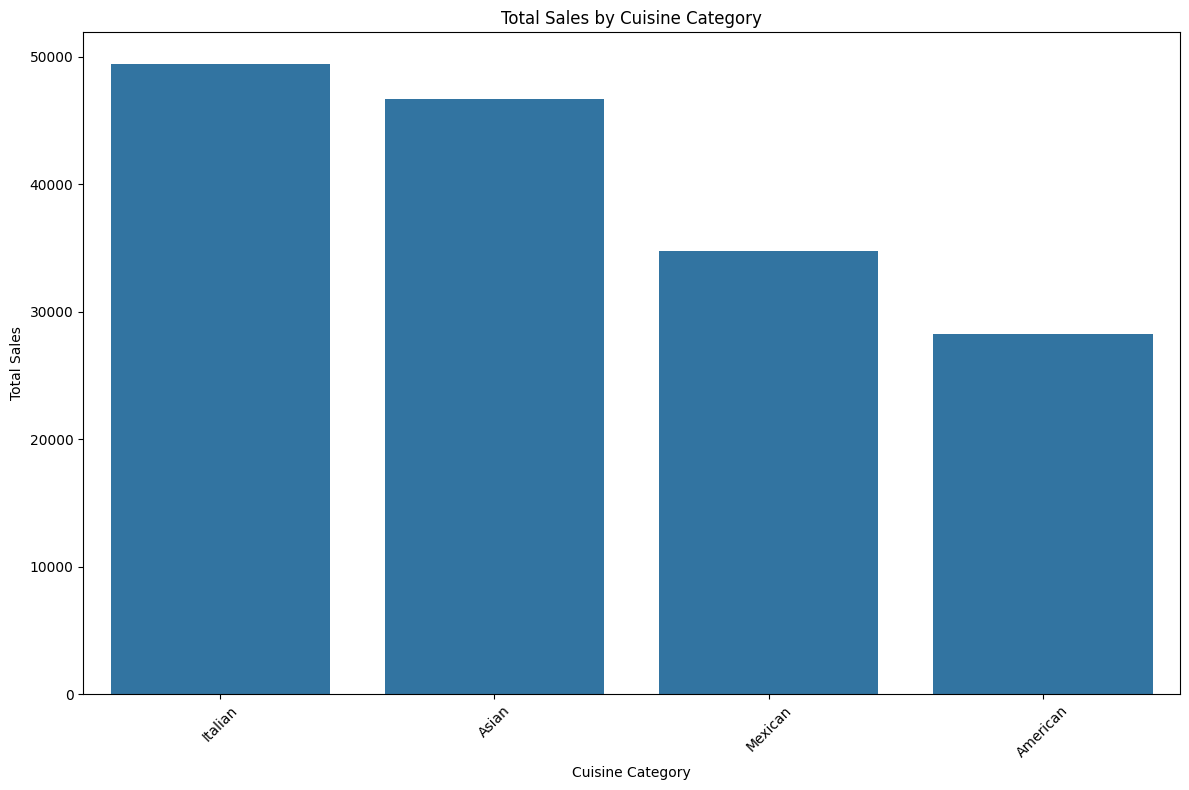

In [ ]:
# Visualizing the data
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='total_sales', data=df)
plt.title('Total Sales by Cuisine Category')
plt.xlabel('Cuisine Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()



The Italian category shows higher total sales compared to other categories, this is because the price of products in the Italian category is more expensive than the price of products in other categories.


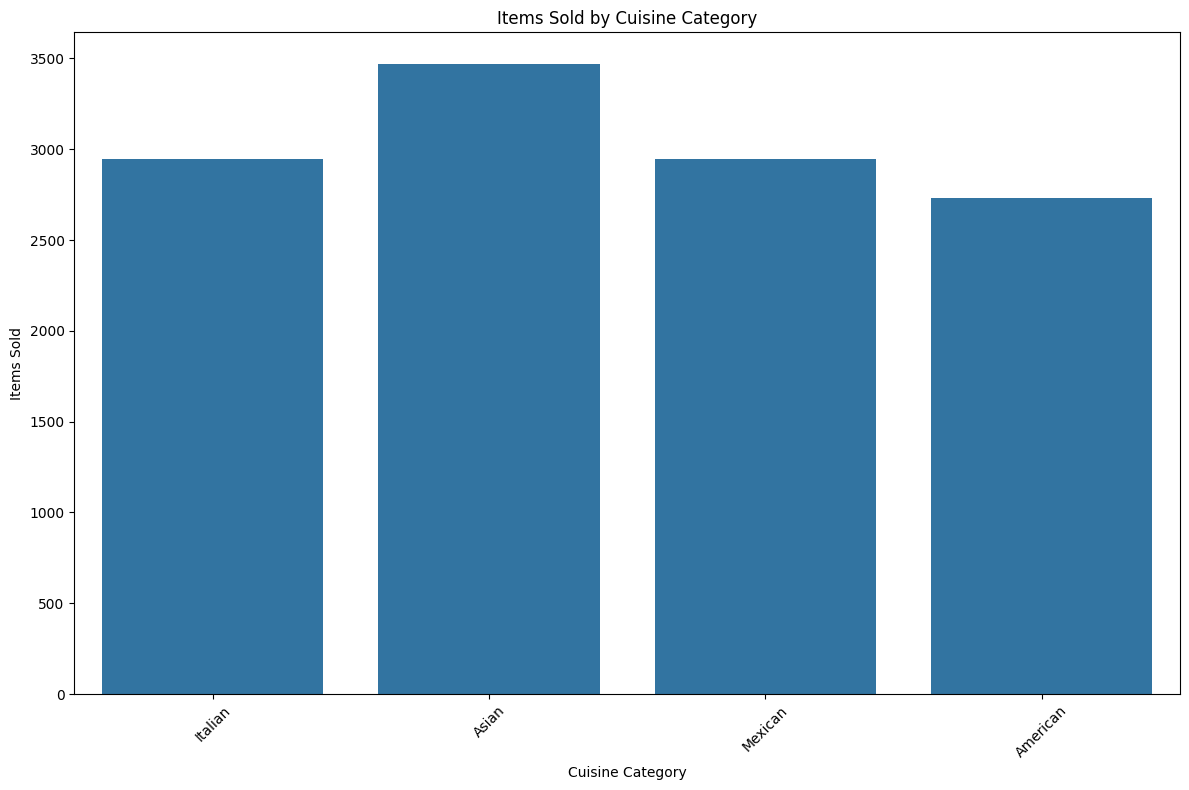

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='items_sold', data=df)
plt.title('Items Sold by Cuisine Category')
plt.xlabel('Cuisine Category')
plt.ylabel('Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Asia category has the highest total items sold compared to other categories.The Italy category despite having the highest total number of sales, seems to produce lower total items sold compared to Asia


Insight :Although the Asia category has a high volume of item sales, the lower sales value indicates that the items may have a lower average price per item compared to other categories.The Italian category managed to generate high total sales not only due to volume but perhaps also due to a combination of higher average price per item and high popularity.

5. Top item most ordered

In [ ]:
# Query for Sales Over Time
sales_over_time ="""
SELECT order_date, COUNT(DISTINCT order_id) AS total_orders
FROM order_details
GROUP BY order_date
ORDER BY order_date;
"""

df = pd.read_sql_query(sales_over_time,conn)
df

,order_date,total_orders
0,2023-01-01,69
1,2023-01-02,67
2,2023-01-03,66
3,2023-01-04,52
4,2023-01-05,54
...,...,...
85,2023-03-27,71
86,2023-03-28,60
87,2023-03-29,54
88,2023-03-30,62


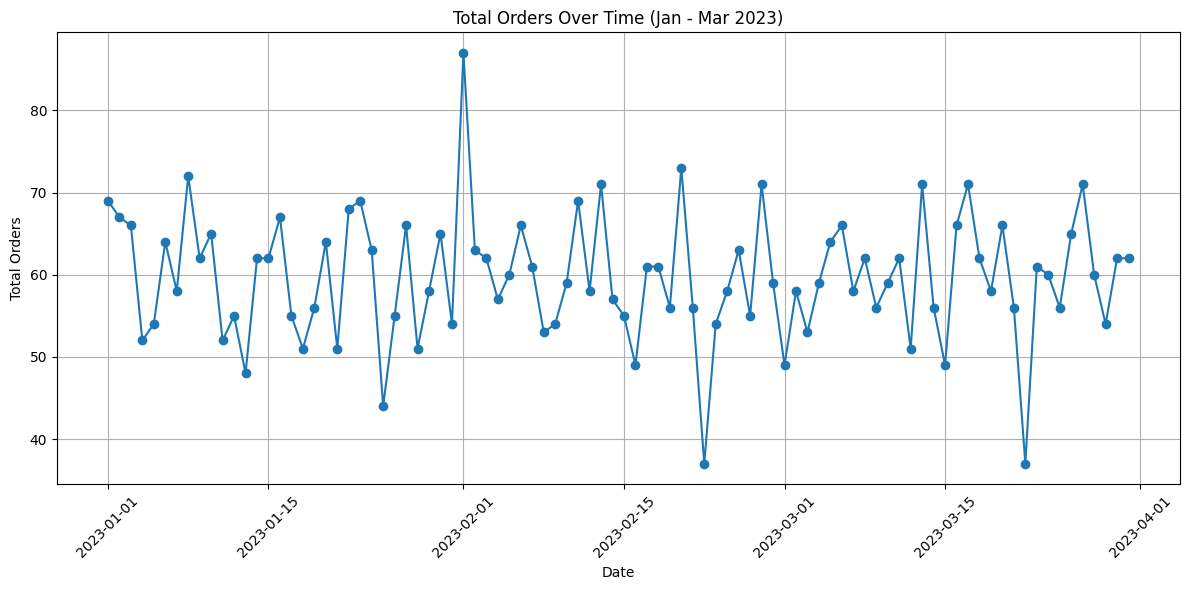

In [ ]:
# Visualization for Sales Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['order_date'], df['total_orders'], marker='o', linestyle='-')
plt.title('Total Orders Over Time (Jan - Mar 2023)')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

There were fluctuations in the total number of orders per day throughout the period January to March 2023. This indicates normal variability in restaurant operations. There were several notable peaks where the number of orders increased significantly. This can happen for various reasons such as special promotions, events, or holidays.

Insight : Tracking back promotional activities or special events that may occur on high order dates can provide strategies for increasing sales on certain days. Restaurants should ensure that they have enough inventory and staff during busy periods, and may need to evaluate operations as they occur. sharp drop in orders.


6. Average Order Value by Day of Week

In [ ]:
# Query for Average Order Value by Day of Week
query = """
SELECT
    EXTRACT(DOW FROM order_date) AS day_of_week,
    TO_CHAR(order_date, 'Day') AS day_name,
    AVG(total_order_value) AS avg_order_value
FROM (
    SELECT
        order_date,
        order_id,
        SUM(mi.price) AS total_order_value
    FROM order_details od
    JOIN menu_items mi ON od.item_id = mi.menu_item_id
    GROUP BY order_id, order_date
) AS subquery
GROUP BY day_of_week, day_name
ORDER BY day_of_week;
"""
avg_order_value_by_day = pd.read_sql_query(query, conn)

avg_order_value_by_day


,day_of_week,day_name,avg_order_value
0,0.0,Sunday,29.326326
1,1.0,Monday,29.520375
2,2.0,Tuesday,30.772069
3,3.0,Wednesday,29.268088
4,4.0,Thursday,29.562720
5,5.0,Friday,30.239732
6,6.0,Saturday,29.902401


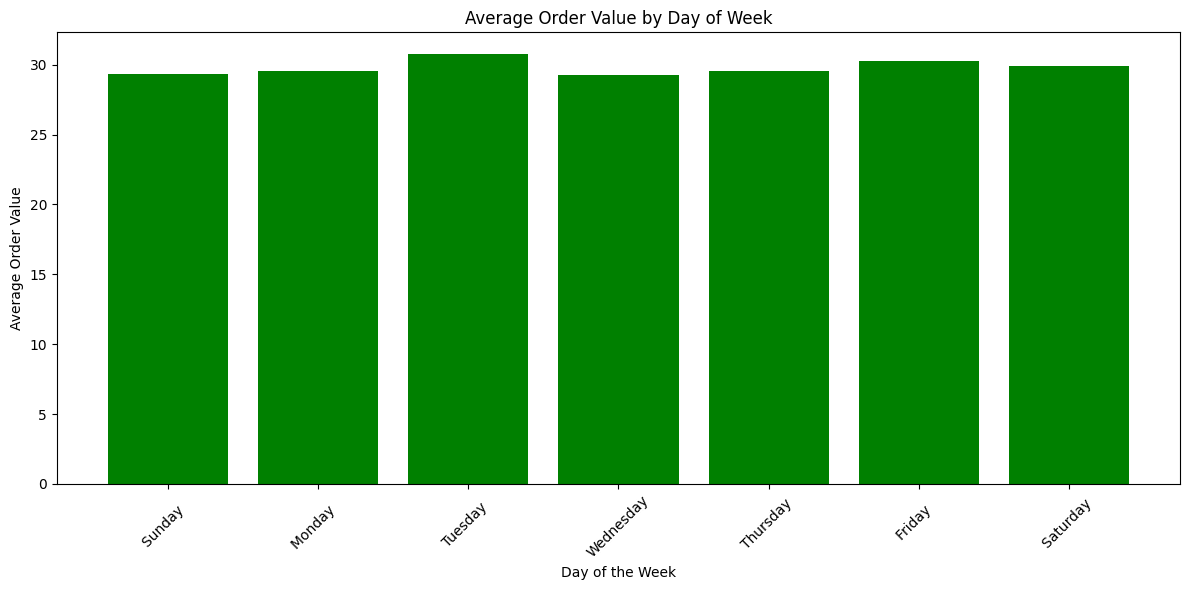

In [ ]:
# Visualization for Average Order Value by Day of Week
plt.figure(figsize=(12, 6))
plt.bar(avg_order_value_by_day['day_name'], avg_order_value_by_day['avg_order_value'], color='green')
plt.title('Average Order Value by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()

The average order value looks fairly consistent throughout the week. No particular day stands out significantly for higher or lower average order values and no large fluctuations in average order value, restaurants may be able to create special promotions or offers on certain days to increase average order value and drive more sales.

Insight : restaurants have the opportunity to add new marketing or promotional initiatives to increase average order value, given the absence of significant variation in order value during the week.


github link

https://www.linkedin.com/posts/muhammadjasirnabil_mid-project-sql-analysis-restaurant-orders-activity-7190220263311958018-N4ei?utm_source=share&utm_medium=member_desktop